In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Dataset

In [55]:
df = pd.read_csv("data/Cars.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## 2. EDA

### Inspect "owner"

In [57]:
# Check all unique values in column "owner"
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [58]:
# Map First owner to 1, ..., Test Drive Car to 5 in owner column
df['owner'].replace({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5}, inplace=True)

df['owner'].unique()

array([1, 2, 3, 4, 5])

In [59]:
# Check selling_price via each category of owner
print('-'*40)
print('Means of selling_price by owner')
print('-'*40)
print(df.groupby(['owner'])['selling_price'].mean().round())
print('-'*40)
print('Median of selling_price by owner')
print('-'*40)
print(df.groupby(['owner'])['selling_price'].median().round())

----------------------------------------
Means of selling_price by owner
----------------------------------------
owner
1     783086.0
2     392964.0
3     284015.0
4     225813.0
5    4403800.0
Name: selling_price, dtype: float64
----------------------------------------
Median of selling_price by owner
----------------------------------------
owner
1     550000.0
2     310000.0
3     225000.0
4     170000.0
5    5923000.0
Name: selling_price, dtype: float64


In [60]:
# Drop "Test Drive Cars" because they are too expensive
df =  df[df['owner'] != 5]
df['owner'].unique()

array([1, 2, 3, 4])

### Inspect "fuel"

In [61]:
# Check all unique values in column "fuel"
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [62]:
# Remove all rows with CNG and LPG because CNG and LPG in "fuel" column
to_remove = ['LPG', 'CNG']
df =  df[~df['fuel'].isin(to_remove)]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

### Inspect "mileage"

In [63]:
# For mileage, remove "kmpl" and convert the column to float type
df['mileage'] = df['mileage'].str.split().str[0].astype(float)
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

### Inspect "Engine"

In [64]:
# For engine, remove "CC" and convert the column to float
df['engine'] = df['engine'].str.split().str[0].astype(float)
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

### Inspect "max_power"

In [65]:
# For max_power, remove "bhp" and convert the column to float
df['max_power'] = df['max_power'].str.split().str[0].astype(float)
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8028, dtype: float64

### Inspect "engine"

In [66]:
# For the feature brand, take only the first word and remove the rest
df['name'] = df['name'].str.split().str[0]
df.rename(columns={'name': 'brand'}, inplace=True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [67]:
# Drop the feature torque
df.drop(columns='torque', inplace=True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Label and One-Hot Encoding

In [68]:
# Check all unique values of 'brand'
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [69]:
# Check all unique values of 'transmission'
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [70]:
# Check all unique values of 'seller_type'
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [71]:
# Check all unique values of 'brand'
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [72]:
# Since 'fuel' and 'transmission' have only two unique values, we can do label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Label encoding on 'fuel'
df['fuel'] = le.fit_transform(df['fuel'])

# Label encoding on 'transmission'
df['transmission'] = le.fit_transform(df['transmission'])

In [73]:
# Since 'brand' and 'seller_type' have than two unique values, we should do one-hot encoding
df = pd.get_dummies(df, columns=['seller_type', 'brand'], drop_first=True)
df.head()

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,...,False,False,False,False,False,False,False,False,False,False
1,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,...,False,False,False,False,False,True,False,False,False,False
2,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,...,False,False,False,False,False,False,False,False,False,False
3,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,...,False,False,False,False,False,False,False,False,False,False
4,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

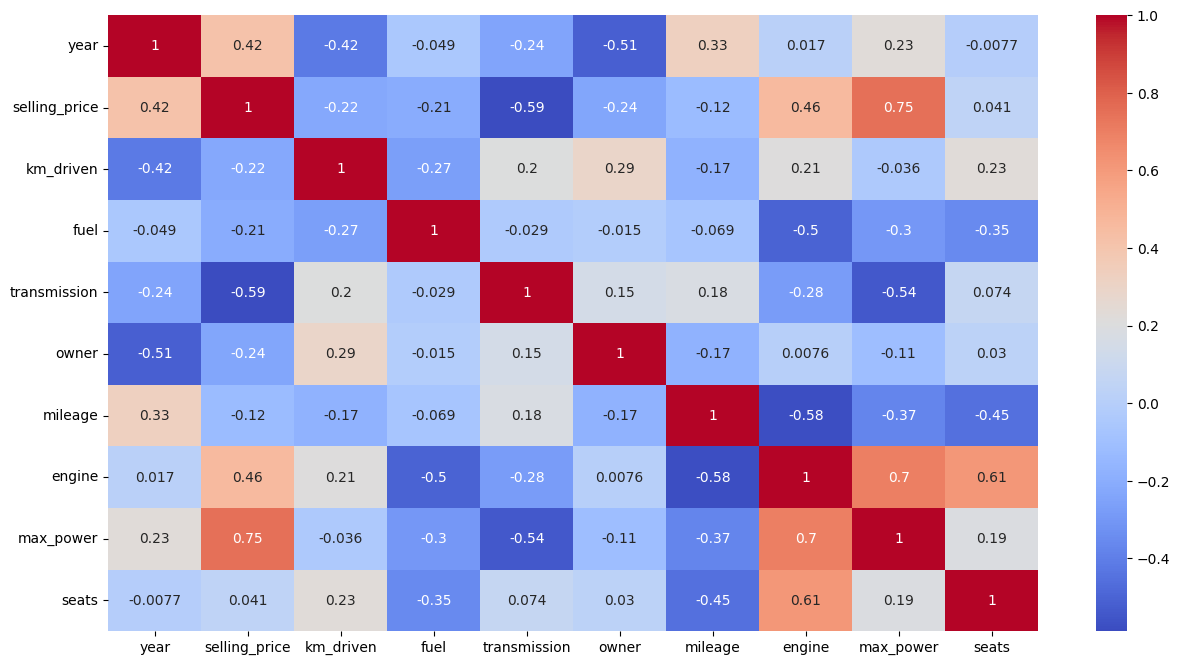

In [76]:
plt.figure(figsize = (15,8))
sns.heatmap(df[
    ['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
    ].corr(numeric_only=True), annot=True, cmap="coolwarm")

## 3. Data Preprocessing